## __Applying Principal Component Analysis (PCA)__ ##
Let's build a principal component analysis.

## Step 1: Import the Necessary Libraries and Load Data set

- Import the **matplotlib.pyplot, pandas, NumPy, Seaborn,** and **sklearn** libraries
- Load the breast cancer data set from sklearn


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

__Observation:__
- The cancer DESCR has given us all the information regarding the cancer data set.

## Step 2: Create a DataFrame

- Create a DataFrame from the cancer data set


In [4]:
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


__Observation:__
- We can see a DataFrame with cancer data and feature names as columns.


## Step 3: Pre-process the Data

- Split the data into training and testing
- Instantiate a StandardScaler object and fit it to the data
- Transform the data using the StandardScaler object


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [7]:
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [8]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [9]:
scaled_data = scaler.transform(df)

## Step 4: Apply PCA

- Import PCA from sklearn.decomposition
- Instantiate a PCA object with two components
- Fit PCA to the scaled data
- Transform the scaled data using PCA
- Check the shape of the transformed data


In [10]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA()

In [13]:
pca.fit(scaled_data)

PCA()

In [14]:
X_new = pca.transform(scaled_data)

In [16]:
scaled_data[:5]

array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00,
         9.84374905e-01,  1.56846633e+00,  3.28351467e+00,
         2.65287398e+00,  2.53247522e+00,  2.21751501e+00,
         2.25574689e+00,  2.48973393e+00, -5.65265059e-01,
         2.83303087e+00,  2.48757756e+00, -2.14001647e-01,
         1.31686157e+00,  7.24026158e-01,  6.60819941e-01,
         1.14875667e+00,  9.07083081e-01,  1.88668963e+00,
        -1.35929347e+00,  2.30360062e+00,  2.00123749e+00,
         1.30768627e+00,  2.61666502e+00,  2.10952635e+00,
         2.29607613e+00,  2.75062224e+00,  1.93701461e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,
         1.90870825e+00, -8.26962447e-01, -4.87071673e-01,
        -2.38458552e-02,  5.48144156e-01,  1.39236330e-03,
        -8.68652457e-01,  4.99254601e-01, -8.76243603e-01,
         2.63326966e-01,  7.42401948e-01, -6.05350847e-01,
        -6.92926270e-01, -4.40780058e-01,  2.60162067e-01,
        -8.05450380e-01, -9.94437403e-02,  1.80592744e+

In [17]:
X_new[:5]

array([[ 9.19283683e+00,  1.94858307e+00, -1.12316616e+00,
         3.63373090e+00, -1.19511012e+00,  1.41142445e+00,
         2.15936987e+00, -3.98407230e-01, -1.57118359e-01,
        -8.77401880e-01,  2.62955455e-01, -8.59014477e-01,
         1.03387665e-01, -6.90804097e-01, -6.01793127e-01,
         7.45115792e-01, -2.65470777e-01, -5.49562693e-01,
        -1.33767500e-01,  3.45564905e-01,  9.65148929e-02,
         6.88499220e-02,  8.45185932e-02, -1.75256284e-01,
        -1.51020059e-01, -2.01503451e-01, -2.52584993e-01,
        -3.39144536e-02,  4.56477199e-02, -4.71692081e-02],
       [ 2.38780180e+00, -3.76817174e+00, -5.29292687e-01,
         1.11826386e+00,  6.21774980e-01,  2.86563545e-02,
         1.33580935e-02,  2.40988459e-01, -7.11904816e-01,
         1.10699494e+00,  8.13119658e-01,  1.57922585e-01,
        -9.43529283e-01, -6.53475327e-01,  8.97486713e-03,
        -6.48808694e-01, -1.72122035e-02,  3.18297381e-01,
         2.47564629e-01, -1.14133080e-01, -7.73274741e-

In [18]:
pca.explained_variance_ratio_

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

In [19]:
pca.explained_variance_ratio_.cumsum()

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])

In [20]:
scaled_data.shape

(569, 30)

In [21]:
pca = PCA(n_components=4)
pca.fit(scaled_data)
X_new = pca.transform(scaled_data)

In [22]:
X_new.shape

(569, 4)

In [23]:
X_new[:5]

array([[ 9.19283683,  1.94858307, -1.12316618,  3.63373088],
       [ 2.3878018 , -3.76817174, -0.52929268,  1.11826383],
       [ 5.73389628, -1.0751738 , -0.55174759,  0.91208273],
       [ 7.1229532 , 10.27558912, -3.23278955,  0.15254703],
       [ 3.93530207, -1.94807157,  1.38976673,  2.94063937]])

## Step 5: Visualize the PCA Results

- Create a scatter plot of the two principal components, with the target variable as color

Text(0, 0.5, 'Second Principal Component')

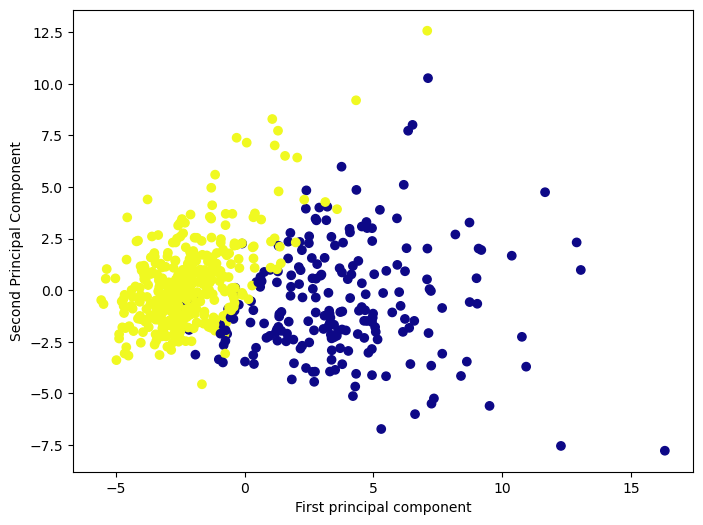

In [24]:
plt.figure(figsize=(8,6))
plt.scatter(X_new[:,0],X_new[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

## Step 6: Analyze the PCA Components

- Display the PCA component matrix
- Display the explained variance


In [25]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947],
       [-0.00853124,  0.06454991, -0.00931422,  0.02869953, -0.1042919 ,
        -0.07409157,  0.00273384, -0.02556354, -0

In [26]:
pca.explained_variance_

array([13.30499079,  5.7013746 ,  2.82291016,  1.98412752])